### 1. 데이터불러오기,  
       train.csv 파일만 불러오기
       train.csv를 데이터프레임 df로 저장하고 df의 변수, 전체 데이터 형태 파악  
       df의 결측지 확인

In [1]:
import pandas as pd

#train=pd.read_csv('train.csv')
#test=pd.read_csv('test.csv')
#sub=pd.read_csv('submission_sample.csv')
df = pd.read_csv('C:/Users/Leo Kim/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

### 2. 데이터프레임 3개로 분할  
       (데이터 프레임 3개 생성)  

#### df를 3개의 데이터 프레임(df_feature, df_2017, df_2016)으로 변환

**df_feature**  
inst_id - 각 파일에서의 병원 고유 번호  
OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함  
sido – 병원의 광역 지역 정보  
sgg – 병원의 시군구 자료  
openDate – 병원 설립일  
bedCount - 병원이 갖추고 있는 병상의 수  
instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류  

**df_2017**  
2017년 회계 데이터  
  
**df_2016**  
2016년 회계 데이터  


In [2]:
# 슬라이싱으로 데이터 분할(행,열) part.1
df.iloc[:,:7]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind
0,1,open,choongnam,73,20071228,175.0,nursing_hospital
1,3,open,gyeongnam,32,19970401,410.0,general_hospital
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital
3,7,open,incheon,141,20000814,353.0,general_hospital
4,9,open,gyeongnam,32,20050901,196.0,general_hospital
...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital
297,423,close,choongnam,159,20140618,NaN,hospital
298,426,close,gyeongbuk,107,19830705,NaN,hospital
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital


In [3]:
# 슬라이싱으로 데이터 분할(행,열) part.2
df.iloc[:,7:31]

,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,...,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,...,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00
3,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,...,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09
4,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,...,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,1.875761e+08,0.0,5.943868e+08,2.776603e+09,...,1.171868e+10,1.198567e+08,0.0,8.715369e+09,1.520004e+09,0.000000e+00,7.195366e+09,5.930000e+09,5.973889e+09,1.406028e+09
297,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,1.398513e+08,1.296975e+08,0.0,-1.622521e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
298,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,1.379810e+08,1.379810e+08,0.0,-7.175308e+07,3.867238e+09,...,5.419756e+09,6.795734e+07,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00
299,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,5.366919e+08,5.143688e+08,0.0,-1.850554e+09,4.929370e+09,...,4.441451e+09,0.000000e+00,73742310.0,5.804268e+08,7.507060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
# 슬라이싱으로 데이터 분할(행,열) part.3
df.iloc[:,31:55]

,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
0,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,2.078297e+08,8.301695e+08,...,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,8.383875e+08,1.112572e+10,...,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09
4,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,3.264258e+07,4.906776e+09,...,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7.068816e+09,4.057855e+08,6.755147e+09,3.768952e+09,90318167.0,2.090078e+08,1.966598e+08,51608640.0,-2.624151e+08,2.550562e+09,...,1.210466e+10,7.685672e+07,0.0,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08
297,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
298,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,1.330644e+08,1.079726e+08,0.0,-1.518272e+08,4.074622e+09,...,5.419756e+09,5.295734e+07,0.0,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00
299,4.096872e+09,4.861985e+08,4.750651e+09,2.896997e+09,10545075.0,1.600243e+09,7.461567e+08,0.0,-2.729675e+09,5.896047e+09,...,4.441451e+09,0.000000e+00,65242310.0,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
# 슬라이싱으로 데이터 분할(행,열)한거 변수에 각각 넣기
df_feature = df.iloc[:,:7]
df_2017 = df.iloc[:,7:31]
df_2016 = df.iloc[:,31:55]

### 3. 데이터 수치 확인
    df_feature, df_2017, df_2016 요약통계량 확인
    df_feature 변수 별 빈도 수 확인
    df_feature, df_2017, df_2016 상관계수 확인
    df_feature의 target변수 ('OC')가 0인(폐업인 병원) 데이터로 새로운 데이터프레임 df_close 생성

In [6]:
df_feature.describe()

,inst_id,sgg,openDate,bedCount
count,301.000000,301.000000,3.010000e+02,296.000000
mean,219.056478,81.039867,2.005013e+07,145.709459
std,121.234869,50.969714,8.893815e+04,118.923890
min,1.000000,1.000000,1.978012e+07,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000
50%,230.000000,75.000000,2.007113e+07,136.500000
75%,321.000000,123.000000,2.011102e+07,193.000000
max,428.000000,178.000000,2.017061e+07,656.000000


In [7]:
df_2017.describe()

,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
count,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02
mean,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,1.868966e+08,7.847322e+07,2.101700e+08,3.536587e+09,...,1.053408e+10,3.406503e+08,2.516802e+05,8.765310e+09,4.352925e+09,1.758237e+09,4.583473e+09,2.646564e+09,5.938213e+09,1.265935e+09
std,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,2.738658e+08,2.486102e+08,1.134673e+09,6.285995e+09,...,1.574525e+10,9.359381e+08,4.308072e+06,1.286112e+10,6.474262e+09,3.194540e+09,7.847530e+09,4.697523e+09,1.266035e+10,8.248321e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.696701e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.019624e+10,-2.914970e+09
25%,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,5.066474e+07,0.000000e+00,-2.168279e+06,7.199253e+08,...,2.700124e+09,9.680000e+05,0.000000e+00,1.953077e+09,5.110121e+08,0.000000e+00,4.285000e+08,0.000000e+00,1.224795e+09,0.000000e+00
50%,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,1.097329e+08,1.024900e+06,8.130751e+07,1.516732e+09,...,5.549397e+09,3.582526e+07,0.000000e+00,4.457667e+09,1.754752e+09,2.295704e+08,2.036935e+09,1.136776e+09,3.033907e+09,0.000000e+00
75%,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,2.242308e+08,4.435396e+07,2.930329e+08,3.379067e+09,...,1.215499e+10,2.038200e+08,0.000000e+00,9.437917e+09,5.415331e+09,2.139742e+09,4.901485e+09,3.327098e+09,5.982550e+09,1.261600e+08
max,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,2.841475e+09,2.808883e+09,7.475427e+09,4.280836e+10,...,1.560000e+11,1.008517e+10,7.374231e+07,8.669725e+10,3.937388e+10,1.988520e+10,5.501736e+10,4.112490e+10,1.390000e+11,1.340000e+11


In [8]:
df_2016.describe()

,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02
mean,1.170905e+10,1.842095e+09,9.203487e+09,5.023230e+09,2.223813e+08,5.617669e+08,1.736360e+08,6.832259e+07,2.563439e+08,3.222852e+09,...,9.651555e+09,3.232921e+08,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08
std,1.894998e+10,6.744178e+09,1.352567e+10,7.406530e+09,5.274637e+08,1.121856e+09,2.693894e+08,2.428512e+08,1.111963e+09,6.015755e+09,...,1.521792e+10,8.784355e+08,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.064823e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09
25%,2.731342e+09,0.000000e+00,2.253260e+09,1.347918e+09,6.453360e+06,6.473168e+07,3.142969e+07,0.000000e+00,0.000000e+00,4.703623e+08,...,2.338407e+09,0.000000e+00,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00
50%,5.005326e+09,1.732994e+08,4.170070e+09,2.365338e+09,4.326228e+07,1.716015e+08,9.422300e+07,1.006880e+06,1.011691e+08,1.234392e+09,...,5.124338e+09,2.733600e+07,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00
75%,1.195690e+10,8.422059e+08,9.806518e+09,5.564048e+09,1.619761e+08,4.774473e+08,1.993574e+08,3.323403e+07,3.197256e+08,2.959041e+09,...,1.097257e+10,2.337850e+08,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08
max,1.370000e+11,8.658159e+10,9.837840e+10,6.127911e+10,4.035895e+09,8.826977e+09,2.593366e+09,2.790916e+09,1.027037e+10,4.081869e+10,...,1.630000e+11,8.767966e+09,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10


In [9]:
# df_feature 변수 별 빈도 수 확인
df_feature.count()

inst_id     301
OC          301
sido        301
sgg         301
openDate    301
bedCount    296
instkind    300
dtype: int64

In [10]:
# df_feature, df_2017, df_2016 상관계수 확인
df_feature.corr()

,inst_id,sgg,openDate,bedCount
inst_id,1.000000,0.089119,0.100530,-0.201146
sgg,0.089119,1.000000,0.026059,0.021090
openDate,0.100530,0.026059,1.000000,0.019251
bedCount,-0.201146,0.021090,0.019251,1.000000


In [11]:
df_2017.corr()

,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
revenue1,1.000000,0.763828,0.948704,0.887745,0.488480,0.547292,0.395143,0.532650,0.194505,0.849537,...,0.723044,0.624425,-0.030880,0.786963,0.759557,0.352606,0.667948,0.308927,0.656025,0.331676
salescost1,0.763828,1.000000,0.529645,0.442412,0.293315,0.313329,0.066624,0.276444,0.038196,0.648095,...,0.383806,0.490421,-0.013725,0.453118,0.464762,0.151312,0.363811,0.060065,0.427265,0.141113
sga1,0.948704,0.529645,1.000000,0.965193,0.493348,0.537183,0.488017,0.524206,0.153972,0.786382,...,0.769554,0.591363,-0.027650,0.814186,0.778898,0.398584,0.696153,0.366774,0.651069,0.361112
salary1,0.887745,0.442412,0.965193,1.000000,0.507201,0.539640,0.469107,0.461356,0.113468,0.708509,...,0.801923,0.517249,-0.024818,0.805431,0.733606,0.392435,0.723421,0.362941,0.636740,0.311386
noi1,0.488480,0.293315,0.493348,0.507201,1.000000,0.840733,0.152248,0.265460,0.239735,0.435608,...,0.421520,0.234116,-0.010663,0.474411,0.268320,0.056275,0.551743,0.159315,0.312138,0.096600
noe1,0.547292,0.313329,0.537183,0.539640,0.840733,1.000000,0.359191,0.337355,0.313376,0.514582,...,0.527282,0.312003,0.001388,0.635517,0.448610,0.213734,0.673581,0.318008,0.328938,0.104526
interest1,0.395143,0.066624,0.488017,0.469107,0.152248,0.359191,1.000000,0.051729,0.013775,0.263684,...,0.561891,0.299566,0.070095,0.696268,0.694612,0.553814,0.573627,0.757982,0.143319,0.049228
ctax1,0.532650,0.276444,0.524206,0.461356,0.265460,0.337355,0.051729,1.000000,0.512296,0.618822,...,0.349893,0.237473,-0.018503,0.295950,0.248715,0.023916,0.279454,0.068989,0.632260,0.678585
profit1,0.194505,0.038196,0.153972,0.113468,0.239735,0.313376,0.013775,0.512296,1.000000,0.360438,...,0.085023,0.039957,-0.106463,0.144326,0.074355,-0.060082,0.169201,0.142990,0.187656,0.090010
liquidAsset1,0.849537,0.648095,0.786382,0.708509,0.435608,0.514582,0.263684,0.618822,0.360438,1.000000,...,0.611647,0.591096,0.012989,0.665962,0.630354,0.199419,0.572745,0.274906,0.736067,0.402957


In [12]:
df_2016.corr()

,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
revenue2,1.000000,0.770230,0.950416,0.894746,0.691149,0.671073,0.414870,0.567484,0.338521,0.830917,...,0.721753,0.586514,-0.023548,0.797762,0.687819,0.357909,0.706266,0.329849,0.687489,0.377707
salescost2,0.770230,1.000000,0.547769,0.470446,0.434250,0.334691,0.072895,0.391475,0.174778,0.642365,...,0.397924,0.444042,-0.011786,0.434413,0.370684,0.088870,0.391587,0.063438,0.495995,0.161345
sga2,0.950416,0.547769,1.000000,0.966696,0.688723,0.666331,0.520638,0.492949,0.264260,0.761195,...,0.772055,0.572368,-0.019299,0.839574,0.740488,0.439806,0.727650,0.407437,0.658634,0.364749
salary2,0.894746,0.470446,0.966696,1.000000,0.705992,0.657474,0.481245,0.466126,0.217439,0.701620,...,0.803401,0.483127,-0.016829,0.813449,0.684075,0.431899,0.739828,0.376368,0.687676,0.376440
noi2,0.691149,0.434250,0.688723,0.705992,1.000000,0.737414,0.154321,0.535783,0.383439,0.666522,...,0.530523,0.231882,-0.023543,0.555718,0.381648,0.086649,0.565777,0.092473,0.586248,0.379432
noe2,0.671073,0.334691,0.666331,0.657474,0.737414,1.000000,0.379428,0.613812,0.507603,0.695359,...,0.547315,0.310654,0.054264,0.685801,0.499276,0.274685,0.682955,0.293693,0.516956,0.532184
interest2,0.414870,0.072895,0.520638,0.481245,0.154321,0.379428,1.000000,0.024858,-0.017554,0.279137,...,0.560068,0.348172,0.124584,0.690278,0.773674,0.635322,0.457468,0.644294,0.168169,0.131203
ctax2,0.567484,0.391475,0.492949,0.466126,0.535783,0.613812,0.024858,1.000000,0.717063,0.655835,...,0.262852,0.347791,-0.016492,0.400716,0.236224,0.022709,0.445235,-0.025495,0.482793,0.642111
profit2,0.338521,0.174778,0.264260,0.217439,0.383439,0.507603,-0.017554,0.717063,1.000000,0.474079,...,0.147119,0.063936,-0.157418,0.238250,0.095317,-0.027398,0.298914,0.036661,0.352877,0.524253
liquidAsset2,0.830917,0.642365,0.761195,0.701620,0.666522,0.695359,0.279137,0.655835,0.474079,1.000000,...,0.558195,0.516006,0.026049,0.692300,0.565148,0.201401,0.634474,0.270924,0.677894,0.364871


In [91]:
# df_feature의 target변수 ('OC')가 0인(폐업인 병원) 데이터로 새로운 데이터프레임 df_close 생성

df_close = df_feature.loc[df_feature['OC']==' close']
df_close = df_close.replace(' close',0)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,date_year
35,58,0,gyeonggi,168,20130206,132.0,nursing_hospital,2013
71,107,0,jeonbuk,26,19990805,NaN,traditional_hospital,1999
93,140,0,gyeongbuk,114,20070420,203.0,hospital,2007
111,164,0,jeonbuk,136,20050321,326.0,nursing_hospital,2005
141,209,0,busan,63,19991112,151.0,hospital,1999
158,238,0,jeonnam,19,20150316,119.0,hospital,2015
177,265,0,jeonnam,53,20051111,652.0,nursing_hospital,2005
193,281,0,gyeonggi,12,20121213,NaN,NaN,2012
212,306,0,jeonnam,33,19990603,66.0,nursing_hospital,1999
214,309,0,seoul,36,20141226,0.0,clinic,2014


### 4. 전처리
    df_feature의 변수 'inst_id' 제거
    df_feature의 모든 결측치 'nan'으로 처리
    df_feature의 변수 'OC'를 값을 'open'은 0으로 'close'는 1로 변환 ('close'가 ' close'로 입력되있음)
    df_feature의 변수 'openDate'의 년도에 해당하는 부분만 추출하여 새로운 변수 'date_year'생성 ex) 20170817 -> 2017

In [15]:
# df_feature의 변수 'inst_id' 제거
df_feature.drop('inst_id', axis=1)

,OC,sido,sgg,openDate,bedCount,instkind
0,open,choongnam,73,20071228,175.0,nursing_hospital
1,open,gyeongnam,32,19970401,410.0,general_hospital
2,open,gyeonggi,89,20161228,468.0,nursing_hospital
3,open,incheon,141,20000814,353.0,general_hospital
4,open,gyeongnam,32,20050901,196.0,general_hospital
...,...,...,...,...,...,...
296,open,jeonnam,178,20050211,214.0,nursing_hospital
297,close,choongnam,159,20140618,NaN,hospital
298,close,gyeongbuk,107,19830705,NaN,hospital
299,close,gyeonggi,169,20070101,180.0,nursing_hospital


In [16]:
# df_feature의 모든 결측치 'nan'으로 처리
df_feature.fillna('nan').isnull()
df_feature

,inst_id,OC,sido,sgg,openDate,bedCount,instkind
0,1,open,choongnam,73,20071228,175.0,nursing_hospital
1,3,open,gyeongnam,32,19970401,410.0,general_hospital
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital
3,7,open,incheon,141,20000814,353.0,general_hospital
4,9,open,gyeongnam,32,20050901,196.0,general_hospital
...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital
297,423,close,choongnam,159,20140618,NaN,hospital
298,426,close,gyeongbuk,107,19830705,NaN,hospital
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital


In [17]:
# df_feature의 변수 'OC'를 값을 'open'은 0으로 'close'는 1로 변환 ('close'가 ' close'로 입력되있음)
df_feature['OC'].replace({'open':0,' close':1})

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    1
298    1
299    1
300    0
Name: OC, Length: 301, dtype: int64

In [18]:
# df_feature의 변수 'openDate'의 년도에 해당하는 부분만 추출하여 새로운 변수 'date_year'생성 ex) 20170817 -> 2017
# 현재 openDate 값들만 추출
date_year_list = df_feature['openDate'].values
# date_year를 넣을 리스트 만들기
date_nyear_list = []
# 반복문으로 4자리 연도만 뽑아서 추출
for i in date_year_list:
    date_nyear_list.append(str(i)[:4])

# date_year라는 데이터 프레임으로 완성
date_year = pd.DataFrame(date_nyear_list, columns=['date_year'])
date_year

,date_year
0,2007
1,1997
2,2016
3,2000
4,2005
...,...
296,2005
297,2014
298,1983
299,2007


In [19]:
# df_feature 데이터 프레임에 date_year라는 이름의 칼럼 추가하기
df_feature['date_year'] = date_year['date_year']
df_feature

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,date_year
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,2007
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,1997
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,2016
3,7,open,incheon,141,20000814,353.0,general_hospital,2000
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,2005
...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,2005
297,423,close,choongnam,159,20140618,NaN,hospital,2014
298,426,close,gyeongbuk,107,19830705,NaN,hospital,1983
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2007


### 5. 시각화
    df_feature의 범주형 변수 ('OC', 'sido', 'instkind') 각각 countplot 그려보기
    df_feature의 연속형 변수 ('bedCount') distplot 그려보기

    df_feature heatmap 그려보기
    df_2017 heatmap 그려보기
    df_2016 heatmap 그려보기
    
    위에서 그린 각각의 countplot에 hue옵션으로 target변수 'OC' 추가하여 그려보기
    df_feature의 target변수('OC')가 각각 open인 distplot, close인 distplot 겹쳐서 그려보기

In [20]:
# 시각화 관련 import 국룰 정리
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='OC', ylabel='count'>

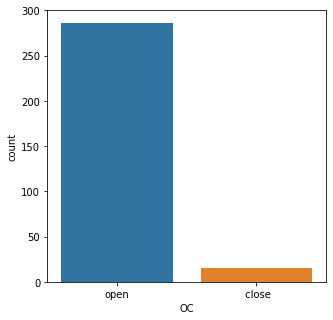

In [21]:
# df_feature의 범주형 변수 ('OC') countplot 그려보기
plt.figure(figsize=(5,5))
sns.countplot('OC',data=df_feature)

<AxesSubplot:xlabel='sido', ylabel='count'>

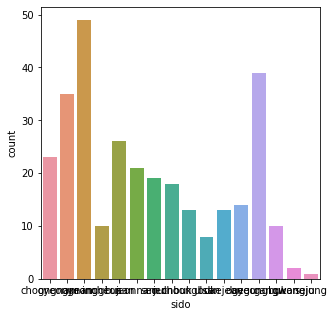

In [22]:
# df_feature의 범주형 변수 ('sido') countplot 그려보기
plt.figure(figsize=(5,5))
sns.countplot('sido',data=df_feature)

<AxesSubplot:xlabel='instkind', ylabel='count'>

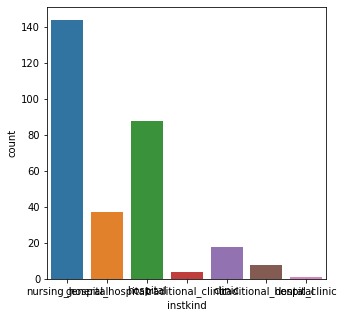

In [23]:
# df_feature의 범주형 변수 ('instkind') countplot 그려보기
plt.figure(figsize=(5,5))
sns.countplot('instkind',data=df_feature)

<AxesSubplot:xlabel='bedCount', ylabel='Density'>

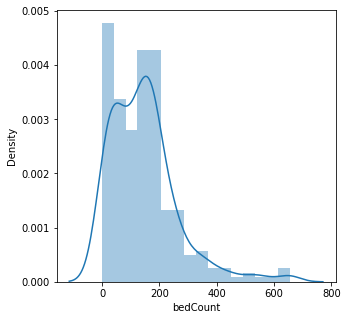

In [64]:
# df_feature의 연속형 변수 ('bedCount') distplot 그려보기
plt.figure(figsize=(5,5))
sns.distplot(df_feature['bedCount'])
#sns.distplot(df_feature['bedCount'], bins=100) # 빈 갯수 조정
#sns.distplot(df_feature['bedCount'], hist=True, kde=False, rug=False) # 막대그래프만 그리기(선 없애기)
#sns.distplot(df_feature['bedCount'], hist=True, kde=True, rug=True) # Rug는 x축에 데이터를 1차원으로 표시 및 커널 밀도를 표시
#sns.distplot(df_feature['bedCount'], color='red', vertical=True) # 색 조정 및 세로축 중심으로 출력하기

In [40]:
# df_feature heatmap 그려보기

df_fcorr = df_feature.corr()
df_fcorr

,inst_id,sgg,openDate,bedCount
inst_id,1.000000,0.089119,0.100530,-0.201146
sgg,0.089119,1.000000,0.026059,0.021090
openDate,0.100530,0.026059,1.000000,0.019251
bedCount,-0.201146,0.021090,0.019251,1.000000


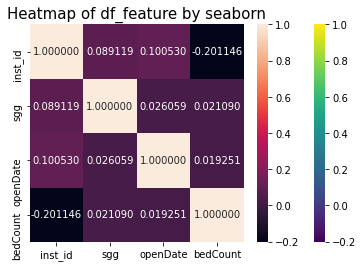

In [41]:
sns.heatmap(df_fcorr, cmap='viridis')
sns.heatmap(df_fcorr, annot=True, fmt='f')
plt.title('Heatmap of df_feature by seaborn', fontsize=15)
#plt.xlabel('가로축', fontsize=14)
#plt.ylabel('세로축', fontsize=14)

plt.show()

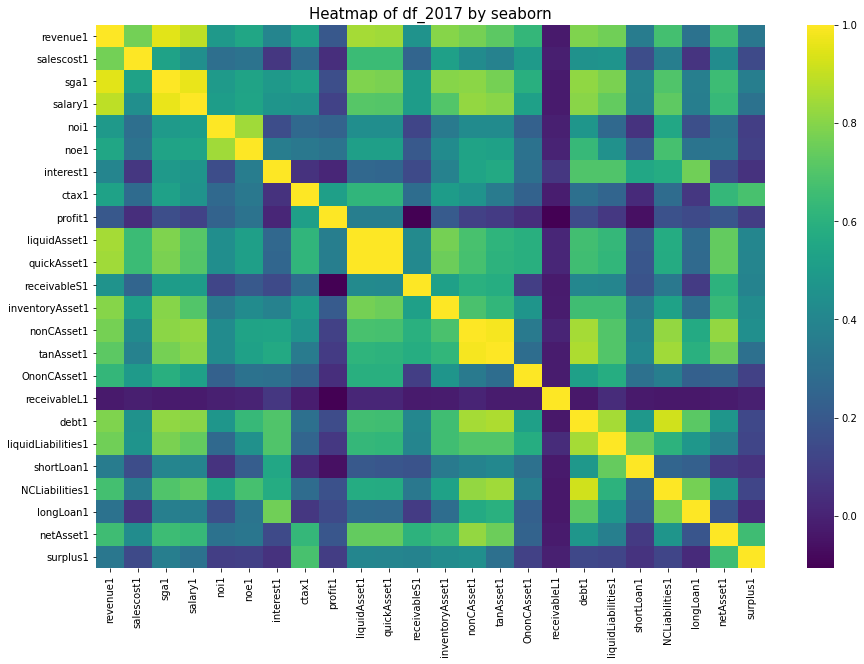

In [50]:
# df_2017 heatmap 그려보기
df_17corr = df_2017.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_17corr, cmap='viridis')
#sns.heatmap(df_17corr, annot=True, fmt='f')
plt.title('Heatmap of df_2017 by seaborn', fontsize=15)

plt.show()

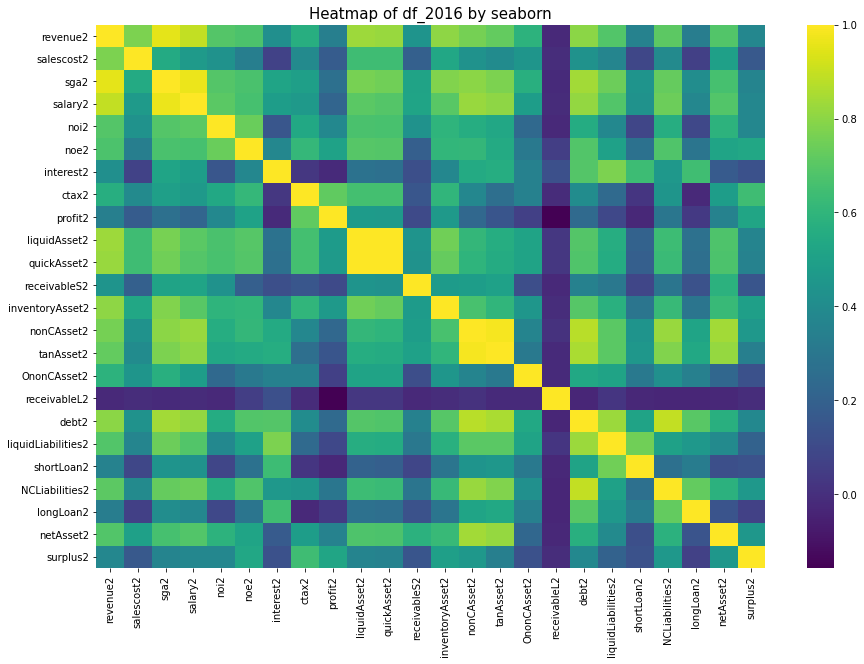

In [51]:
# df_2016 heatmap 그려보기
df_16corr = df_2016.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_16corr, cmap='viridis')
#sns.heatmap(df_16corr, annot=True, fmt='f')
plt.title('Heatmap of df_2016 by seaborn', fontsize=15)

plt.show()

<AxesSubplot:xlabel='sido', ylabel='count'>

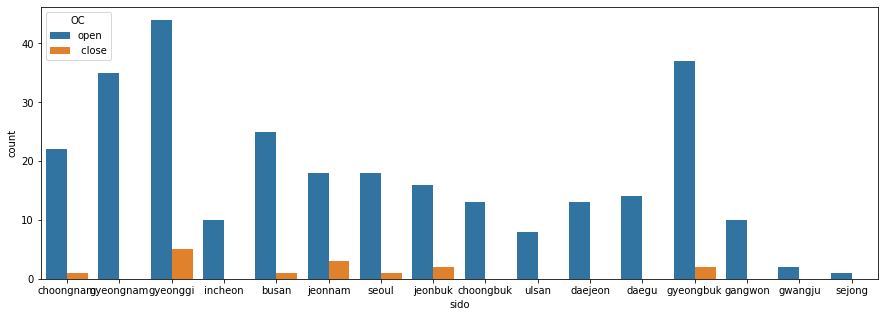

In [56]:
#위에서 그린 sido countplot에 hue옵션으로 target변수 'OC' 추가하여 그려보기
plt.figure(figsize=(15,5))
sns.countplot('sido', hue='OC', data=df_feature)

<AxesSubplot:xlabel='instkind', ylabel='count'>

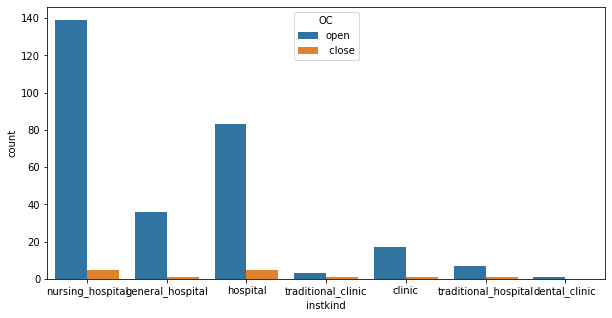

In [57]:
#위에서 그린 instkind countplot에 hue옵션으로 target변수 'OC' 추가하여 그려보기
plt.figure(figsize=(10,5))
sns.countplot('instkind', hue='OC', data=df_feature)

In [76]:
# df_feature 중 OC가 close인 데이터만 변수에 넣기
a=df_feature[df_feature.OC==' close']
a

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,date_year
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2013
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,1999
93,140,close,gyeongbuk,114,20070420,203.0,hospital,2007
111,164,close,jeonbuk,136,20050321,326.0,nursing_hospital,2005
141,209,close,busan,63,19991112,151.0,hospital,1999
158,238,close,jeonnam,19,20150316,119.0,hospital,2015
177,265,close,jeonnam,53,20051111,652.0,nursing_hospital,2005
193,281,close,gyeonggi,12,20121213,NaN,NaN,2012
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,1999
214,309,close,seoul,36,20141226,0.0,clinic,2014


In [78]:
# df_feature 중 OC가 open인 데이터만 변수에 넣기
b=df_feature[df_feature.OC=='open']
b

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,date_year
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,2007
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,1997
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,2016
3,7,open,incheon,141,20000814,353.0,general_hospital,2000
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,2005
...,...,...,...,...,...,...,...,...
293,418,open,gyeonggi,170,20120312,109.0,hospital,2012
294,419,open,gyeongnam,174,20101104,367.0,nursing_hospital,2010
295,420,open,gyeonggi,177,20110523,0.0,nursing_hospital,2011
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,2005


Text(0, 0.5, 'Density')

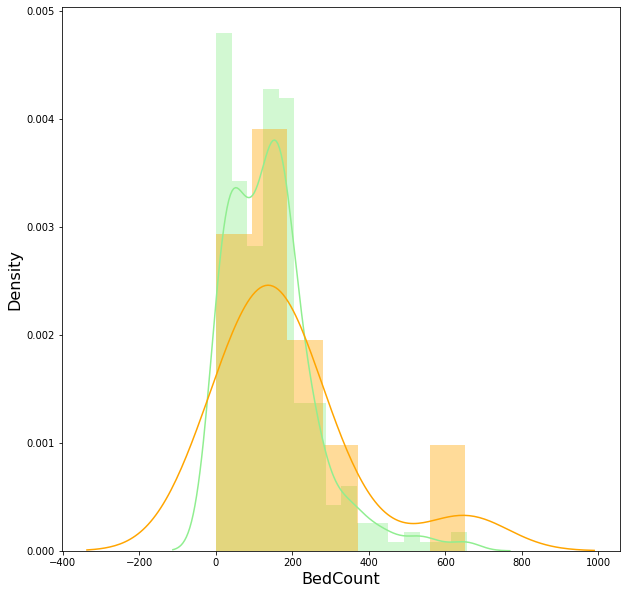

In [100]:
#df_feature의 target변수('OC')가 각각 open인 distplot, close인 distplot 겹쳐서 그려보기
plt.figure(figsize=(10,10))
sns.distplot(b.bedCount, color='lightgreen')
sns.distplot(a.bedCount, color='orange')
plt.xlabel('BedCount', fontsize=16)
plt.ylabel('Density', fontsize=16)